In [1]:
import numpy as np
import neo
import mne
import matplotlib.pyplot as plt

In [2]:
"""
设置event id,用来识别events.
"""
event_id = 1
# 第一列表示样本编号
events = np.array([[200, 0, event_id],
                   [1200, 0, event_id],
                   [2000, 0, event_id]])  # List of three arbitrary events

sfreq = 1000  # 采样频率
times = np.arange(0, 10, 0.001)  # Use 10000 samples (10s)

sin = np.sin(times * 10)  # 乘以 10 缩短周期
cos = np.cos(times * 10)

3 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
0 bad epochs dropped


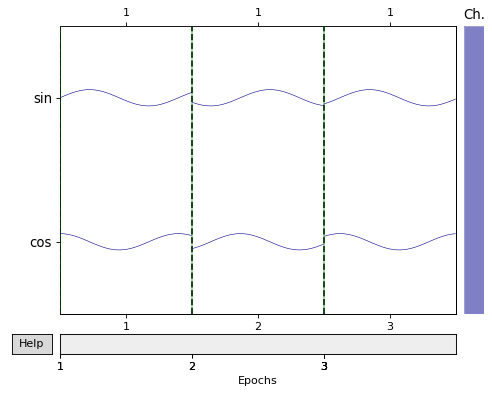

In [3]:
"""
利用sin和cos创建一个2个通道的700 ms epochs的数据集

只要是(n_epochs, n_channels, n_times)形状的数据，都可以被用来创建
"""
epochs_data = np.array([[sin[:700], cos[:700]],
                        [sin[1000:1700], cos[1000:1700]],
                        [sin[1800:2500], cos[1800:2500]]])

ch_names = ['sin', 'cos']
ch_types = ['mag', 'mag']
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

epochs = mne.EpochsArray(epochs_data, info=info, events=events,
                         event_id={'arbitrary': 1})

epochs.plot(scalings='auto' )
plt.show() 